<a href="https://colab.research.google.com/github/LilySu/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/Lily_Su_Assignment5_LS_DS_121_Scrape_and_process_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Scrape and process data

Objectives
- scrape and parse web pages
- use list comprehensions
- select rows and columns with pandas

Links
-  [Automate the Boring Stuff with Python, Chapter 11](https://automatetheboringstuff.com/chapter11/)
  - Requests
  - Beautiful Soup
- [Python List Comprehensions: Explained Visually](https://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Subset Observations (Rows)
  - Subset Variables (Columns)
- Python Data Science Handbook
  - [Chapter 3.1](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html), Introducing Pandas Objects
  - [Chapter 3.2](https://jakevdp.github.io/PythonDataScienceHandbook/03.02-data-indexing-and-selection.html), Data Indexing and Selection


## Scrape the titles of PyCon 2019 talks

In [0]:
url = 'https://us.pycon.org/2019/schedule/talks/list/'

In [0]:
import bs4
import requests

result = requests.get(url)

In [0]:
soup = bs4.BeautifulSoup(result.text)

In [0]:
description = soup.select('.presentation-description')[0]

In [22]:
description

<div class="presentation-description">Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know where to start?

BeeWare is a set of software libraries for cross-platform native app development from a single Python codebase and tools to simplify app deployment. The project aims to build, deploy, and run apps for Windows, Linux, macOS, Android, iPhone, and the web. It is native because it is actually using your platform's native GUI widgets, not a theme, icon pack, or webpage wrapper.

This talk will teach you how Toga, the BeeWare GUI toolkit, is architected and then show you how you can contribute to Toga by creating your own GUI widget in five easy steps.</div>

In [23]:
description.text.strip()

"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know where to start?\r\n\r\nBeeWare is a set of software libraries for cross-platform native app development from a single Python codebase and tools to simplify app deployment. The project aims to build, deploy, and run apps for Windows, Linux, macOS, Android, iPhone, and the web. It is native because it is actually using your platform's native GUI widgets, not a theme, icon pack, or webpage wrapper.\r\n\r\nThis talk will teach you how Toga, the BeeWare GUI toolkit, is architected and then show you how you can contribute to Toga by creating your own GUI widget in five easy steps."

In [24]:
description = [tag.text.strip()
         for tag in soup.select('.presentation-description')]
description

["Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know where to start?\r\n\r\nBeeWare is a set of software libraries for cross-platform native app development from a single Python codebase and tools to simplify app deployment. The project aims to build, deploy, and run apps for Windows, Linux, macOS, Android, iPhone, and the web. It is native because it is actually using your platform's native GUI widgets, not a theme, icon pack, or webpage wrapper.\r\n\r\nThis talk will teach you how Toga, the BeeWare GUI toolkit, is architected and then show you how you can contribute to Toga by creating your own GUI widget in five easy steps.",
 'We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what happens, how the descri

## 5 ways to look at long titles

Let's define a long title as greater than 2500 characters

### 1. For Loop

In [44]:
for i in description:
  if len(i) > 2500:
    print(i)

We all have to package Python based applications for various environments, starting from command line tools, to web applications. And depending on the users, it can be installed on thousands on computers or on a selected few systems. https://pypi.org is our goto place for finding any dependencies and also in most of the time we install binary wheels directly
from there, thus saving a lot time.

But, Python is also being used in many environments where security is the utter most important, and validating the dependencies of project is also very critical along with the actual project source code.  Many of noticed the recent incident where people were being able to [steal bticoins using a popular library](https://www.theregister.co.uk/2018/11/26/npm_repo_bitcoin_stealer/).This talk will take [SecureDrop client application](https://github.com/freedomofpress/securedrop-client) for journalists as an example project and see how we tried to tackle the similar problem. SecureDrop is an Open Sou

# challenge question: get the Flesh-Kincaid grade level
Pt.1
---



In [165]:
!pip install textstat

In [178]:
import textstat

fleschlist =[]
for i in description:
   fleschlist.append(textstat.flesch_kincaid_grade(i))
print(fleschlist)

[14.1, 10.7, 8.5, 17.3, 10.8, 14.7, 14.2, 46.2, 15.4, 19.4, 13.3, 10.5, 9.9, 13.2, 11.0, 17.5, 11.4, 19.7, 51.6, 58.7, 14.0, 15.6, 17.2, 17.5, 54.0, 6.1, 16.3, 10.6, 25.1, 81.3, 12.8, 7.3, 10.7, 10.4, 48.9, 16.5, 23.6, 14.9, 11.0, 20.8, 17.6, 8.5, 16.7, 7.8, 10.0, 10.8, 44.9, 14.1, 32.3, 16.2, 9.1, 8.2, 15.2, 46.6, 7.2, 18.1, 10.4, 27.9, 70.0, 23.8, 14.3, 11.2, 11.7, 12.8, 60.6, 15.4, 10.6, 14.2, 48.5, 13.0, 12.5, 12.0, 13.4, 14.9, 10.4, 6.3, 12.4, 10.0, 61.0, 13.6, 12.6, 12.3, 15.6, 32.6, 45.8, 15.4, 12.0, 16.4, 48.5, 13.3, 13.5, 11.2, 13.2, 15.8, 12.9]


In [0]:
import pandas as pd
pd.options.display.max_colwidth = 200

In [180]:
fleschK = pd.DataFrame(fleschlist)
fleschK.shape

(95, 1)

In [195]:
fleschK

,0
0,14.1
1,10.7
2,8.5
3,17.3
4,10.8
5,14.7
6,14.2
7,46.2
8,15.4
9,19.4


In [198]:
fleschK.columns = ['Grade Level']
fleschK.head()

,Grade Level
0,14.1
1,10.7
2,8.5
3,17.3
4,10.8


# challenge question temporarily ends

### 2. List Comprehension

In [46]:
shorter_description = []
for i in description:
  if len(i) > 2500:
    shorter_description.append(i)
shorter_description

["We all have to package Python based applications for various environments, starting from command line tools, to web applications. And depending on the users, it can be installed on thousands on computers or on a selected few systems. https://pypi.org is our goto place for finding any dependencies and also in most of the time we install binary wheels directly\r\nfrom there, thus saving a lot time.\r\n\r\nBut, Python is also being used in many environments where security is the utter most important, and validating the dependencies of project is also very critical along with the actual project source code.  Many of noticed the recent incident where people were being able to [steal bticoins using a popular library](https://www.theregister.co.uk/2018/11/26/npm_repo_bitcoin_stealer/).This talk will take [SecureDrop client application](https://github.com/freedomofpress/securedrop-client) for journalists as an example project and see how we tried to tackle the similar problem. SecureDrop is 

### 3. Filter with named function

In [48]:
def long(description):
  return len(description) > 2500

list(filter(long,description))

["We all have to package Python based applications for various environments, starting from command line tools, to web applications. And depending on the users, it can be installed on thousands on computers or on a selected few systems. https://pypi.org is our goto place for finding any dependencies and also in most of the time we install binary wheels directly\r\nfrom there, thus saving a lot time.\r\n\r\nBut, Python is also being used in many environments where security is the utter most important, and validating the dependencies of project is also very critical along with the actual project source code.  Many of noticed the recent incident where people were being able to [steal bticoins using a popular library](https://www.theregister.co.uk/2018/11/26/npm_repo_bitcoin_stealer/).This talk will take [SecureDrop client application](https://github.com/freedomofpress/securedrop-client) for journalists as an example project and see how we tried to tackle the similar problem. SecureDrop is 

# Description that will fit in a tweet

In [183]:
def long(description):
  return len(description) < 140

list(filter(long,description))

["Learn how to make music with Python, SuperCollider and FoxDot. We'll create a song together in this live coded adventure."]

### 4. Filter with anonymous function

In [184]:
list(filter(lambda t: len(t) > 2500, description))

["We all have to package Python based applications for various environments, starting from command line tools, to web applications. And depending on the users, it can be installed on thousands on computers or on a selected few systems. https://pypi.org is our goto place for finding any dependencies and also in most of the time we install binary wheels directly\r\nfrom there, thus saving a lot time.\r\n\r\nBut, Python is also being used in many environments where security is the utter most important, and validating the dependencies of project is also very critical along with the actual project source code.  Many of noticed the recent incident where people were being able to [steal bticoins using a popular library](https://www.theregister.co.uk/2018/11/26/npm_repo_bitcoin_stealer/).This talk will take [SecureDrop client application](https://github.com/freedomofpress/securedrop-client) for journalists as an example project and see how we tried to tackle the similar problem. SecureDrop is 

### 5. Pandas

pandas documentation: [Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html)

In [0]:
import pandas as pd
pd.options.display.max_colwidth = 200

In [193]:
descrip = pd.DataFrame({'description': description})
descrip.shape

(95, 1)

# challenge question: get the Flesh-Kincaid grade level continued
# Pt.2
#Final Answer

In [201]:
joined_lists = descrip.join(fleschK, lsuffix='description', rsuffix='Grade Level')
joined_lists

,description,Grade Level
0,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know whe...",14.1
1,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ...",10.7
2,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable pa...",8.5
3,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...,17.3
4,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did.\r\n\r\nBy building a simplified chaos monkey service, we will walk through how to creat...",10.8
5,We will look into a day in the life of a Software Engineer with limited vision to Understand their difficulties at work and how they can overcome those difficulties to become successful in their r...,14.7
6,"Medieval European Nobility was obsessed with Lineage. They created a Heraldic System to track families, which assigned each family a unique Coat of Arms.\r\n\r\nAny painting of the Coat of Arms wa...",14.2
7,"In July of 2018, Guido van Rossum stepped down as “Benevolent Dictator for Life” of Python. In December, Python core developers voted on a new governance structure to guide Python going forward. ...",46.2
8,"If you maintain a library, how can you innovate without breaking the projects that depend on it? Follow semantic versioning, add APIs conservatively, add parameters compatibly, use DeprecationWarn...",15.4
9,"Embroidery is an technology that dates back centuries, and still popular in the present day among craftspeople around the world. Cross-stitch refers to the creation of crosses in a grid that combi...",19.4


In [57]:
descrip.head()

,description
0,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know whe..."
1,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ..."
2,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable pa..."
3,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...
4,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did.\r\n\r\nBy building a simplified chaos monkey service, we will walk through how to creat..."


## Make new dataframe columns

pandas documentation: [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html)

In [0]:
descrip['description length'] = descrip['description'].apply(len)

### title length

In [60]:
descrip.shape

(95, 2)

In [61]:
descrip.head()

,description,description length
0,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know whe...",766
1,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ...",296
2,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable pa...",426
3,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...,507
4,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did.\r\n\r\nBy building a simplified chaos monkey service, we will walk through how to creat...",647


### long title

In [62]:
descrip['long description'] = descrip['description length'] > 2500
descrip.shape

(95, 3)

In [63]:
descrip.head()

,description,description length,long description
0,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know whe...",766,False
1,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ...",296,False
2,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable pa...",426,False
3,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...,507,False
4,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did.\r\n\r\nBy building a simplified chaos monkey service, we will walk through how to creat...",647,False


In [64]:
long_descrip = descrip[descrip['long description']==True]
long_descrip

,description,description length,long description
17,"We all have to package Python based applications for various environments, starting from command line tools, to web applications. And depending on the users, it can be installed on thousands on co...",2827,True


### first letter

In [0]:
descrip['first letter'] = descrip['description'].str[0]

In [67]:
descrip[descrip['first letter']== 'L']

,description,description length,long description,first letter
54,"Learn how to make music with Python, SuperCollider and FoxDot. We'll create a song together in this live coded adventure.",121,False,L


### word count

Using [`textstat`](https://github.com/shivam5992/textstat)

In [68]:
!pip install textstat

In [0]:
import textstat

In [0]:
descrip['description word count'] = descrip['description'].apply(textstat.lexicon_count)

In [80]:
descrip.head()

,description,description character count,long description,first letter,title word count,description word count
0,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know whe...",766,False,H,135,135
1,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ...",296,False,W,56,56
2,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable pa...",426,False,A,66,66
3,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...,507,False,D,84,84
4,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did.\r\n\r\nBy building a simplified chaos monkey service, we will walk through how to creat...",647,False,E,96,96


In [77]:
descrip[descrip['description word count'] >= 240]

,description,description length,long description,first letter,title word count,description word count
17,"We all have to package Python based applications for various environments, starting from command line tools, to web applications. And depending on the users, it can be installed on thousands on co...",2827,True,W,421,421
21,"It’s 2019, and Moore’s Law is dead. CPU performance is plateauing, but GPUs provide a chance for continued hardware performance gains, if you can structure your programs to make good use of them.\...",1903,False,I,311,311
46,"Serverless computing is all about paying only for what you use: it can scale up to handle millions of requests, but it can also scale down to 0, costing you nothing if your application is not rece...",2157,False,S,311,311
59,"Every programmer should learn to use solvers, tools that reason directly from a description of a problem to its solution. \r\n\r\nTools like AlphaZero can formulate winning strategies for games g...",1728,False,E,278,278
70,"In the month of August 2018, Kerala, the southernmost state of India, received 250 % of normal rainfall, resulting in all of its 44 dams to be opened. Over 483 people died due to the flooding caus...",1635,False,I,261,261


## Rename column

`title length` --> `title character count`

pandas documentation: [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

In [78]:
descrip = descrip.rename(columns={'description length': 'description character count'})
descrip.head()

,description,description character count,long description,first letter,title word count,description word count
0,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know whe...",766,False,H,135,135
1,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ...",296,False,W,56,56
2,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable pa...",426,False,A,66,66
3,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...,507,False,D,84,84
4,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did.\r\n\r\nBy building a simplified chaos monkey service, we will walk through how to creat...",647,False,E,96,96


In [81]:
descrip = descrip.rename(columns={'title word count': 'description word count'})
descrip.head()

,description,description character count,long description,first letter,description word count,description word count
0,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know whe...",766,False,H,135,135
1,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ...",296,False,W,56,56
2,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable pa...",426,False,A,66,66
3,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...,507,False,D,84,84
4,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did.\r\n\r\nBy building a simplified chaos monkey service, we will walk through how to creat...",647,False,E,96,96


In [82]:
descrip = descrip.drop(columns="description word count")
descrip.head()

,description,description character count,long description,first letter
0,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know whe...",766,False,H
1,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ...",296,False,W
2,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable pa...",426,False,A
3,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...,507,False,D
4,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did.\r\n\r\nBy building a simplified chaos monkey service, we will walk through how to creat...",647,False,E


In [83]:
descrip['description word count'] = descrip['description'].apply(textstat.lexicon_count)
descrip.head()

,description,description character count,long description,first letter,description word count
0,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know whe...",766,False,H,135
1,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ...",296,False,W,56
2,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable pa...",426,False,A,66
3,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...,507,False,D,84
4,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did.\r\n\r\nBy building a simplified chaos monkey service, we will walk through how to creat...",647,False,E,96


In [132]:
# descrip['Description Flesch-Kincaid Grade Level'] = descrip.apply(textstat.flesch_kincaid_grade(descrip['description']))
descrip2 = descrip['description']
descrip3 = textstat.flesch_kincaid_grade(descrip2[1])
print(descrip3)

10.7


In [163]:
descrip['Flesch'] = descrip['description'].apply(textstat.flesch_kincaid_grade(descrip['description']))


TypeError: ignored

In [0]:
def flesch():

  i = 0
  list = []
  s = descrip['description']

  for i in s:
    descripGrade = textstat.flesch_kincaid_grade([s])
  #   print(descripGrade)
    i = i+1 
    list.append(descripGrade)
    

In [156]:
flesch()

TypeError: ignored

# average description word count

In [100]:
total = 0
for word in descrip['description word count']:
  total += word
mean = total / len(descrip['description word count'])
print("average description word count: {}".format(mean))

average description word count: 130.82105263157894


# The minimum description word count

In [105]:
list1 = descrip['description word count']
# print("Minimum Description: {}".min(list1))
x = min(list1, key=float)
print("The minimum word count: {}".format(x))

The minimum word count: 20


# The maximum description word count

In [107]:
list2 = descrip['description word count']
# print("Minimum Description: {}".min(list1))
x = max(list2, key=float)
print("The maximum word count: {}".format(x))

The maximum word count: 421


## Analyze the dataframe

### Describe

pandas documentation: [describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

In [84]:
descrip.describe()

,description character count,description word count
count,95.000000,95.000000
mean,813.073684,130.821053
std,415.988191,64.357872
min,121.000000,20.000000
25%,542.500000,85.500000
50%,718.000000,116.000000
75%,1016.500000,165.000000
max,2827.000000,421.000000


In [85]:
descrip.describe(include = 'all')

,description,description character count,long description,first letter,description word count
count,95,95.000000,95,95,95.000000
unique,95,NaN,2,20,NaN
top,"Notebooks have traditionally been a tool for drafting code and avoiding repeated expensive computations while exploring solutions. However, with new tools like nteract's papermill and scrapbook li...",NaN,False,W,NaN
freq,1,NaN,94,11,NaN
mean,NaN,813.073684,NaN,NaN,130.821053
std,NaN,415.988191,NaN,NaN,64.357872
min,NaN,121.000000,NaN,NaN,20.000000
25%,NaN,542.500000,NaN,NaN,85.500000
50%,NaN,718.000000,NaN,NaN,116.000000
75%,NaN,1016.500000,NaN,NaN,165.000000


In [86]:
descrip.describe(exclude='number')

,description,long description,first letter
count,95,95,95
unique,95,2,20
top,"Notebooks have traditionally been a tool for drafting code and avoiding repeated expensive computations while exploring solutions. However, with new tools like nteract's papermill and scrapbook li...",False,W
freq,1,94,11


### Sort values

pandas documentation: [sort_values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

Five shortest titles, by character count

In [87]:
descrip.sort_values(by='description character count').head(5)

,description,description character count,long description,first letter,description word count
54,"Learn how to make music with Python, SuperCollider and FoxDot. We'll create a song together in this live coded adventure.",121,False,L,20
1,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ...",296,False,W,56
77,"GraphQL is an exciting technology that can help simplify web logic. Most of the attention has been focused on client-side improvements, such as reducing payload sizes and reducing total number of ...",334,False,G,52
44,"Have you ever wondered how a JIT compiler works? Production quality JIT compilers are large, complicated pieces of software that can seem inscrutable at first glance. However, building a simple J...",336,False,H,52
8,"If you maintain a library, how can you innovate without breaking the projects that depend on it? Follow semantic versioning, add APIs conservatively, add parameters compatibly, use DeprecationWarn...",337,False,I,50


In [88]:
descrip.sort_values(by='description character count')[:5]

,description,description character count,long description,first letter,description word count
54,"Learn how to make music with Python, SuperCollider and FoxDot. We'll create a song together in this live coded adventure.",121,False,L,20
1,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ...",296,False,W,56
77,"GraphQL is an exciting technology that can help simplify web logic. Most of the attention has been focused on client-side improvements, such as reducing payload sizes and reducing total number of ...",334,False,G,52
44,"Have you ever wondered how a JIT compiler works? Production quality JIT compilers are large, complicated pieces of software that can seem inscrutable at first glance. However, building a simple J...",336,False,H,52
8,"If you maintain a library, how can you innovate without breaking the projects that depend on it? Follow semantic versioning, add APIs conservatively, add parameters compatibly, use DeprecationWarn...",337,False,I,50


Titles sorted reverse alphabetically

In [89]:
descrip.sort_values(by='first letter', ascending = False).head()

,description,description character count,long description,first letter,description word count
17,"We all have to package Python based applications for various environments, starting from command line tools, to web applications. And depending on the users, it can be installed on thousands on co...",2827,True,W,421
88,"Why come to yet another talk about CPython's GIL? [1] Sure, we'll spend a little time on what it is, who it affects (and doesn't), and how to work around it. However, what you want to come hear ...",665,False,W,122
68,"While high-level security concepts may transcend languages, each language has its own sets of tools and edge cases that are worth knowing. Python is one of many popular languages that is rarely t...",708,False,W,116
91,"Walk into any factory and you will see a Programmable Logic Controller (PLC). It's the small box that has a memory card and an Ethernet cable on one side, and lots of colorful wires connected to t...",1019,False,W,184
56,"When machine learning models make decisions that affect people’s lives, how can you be sure those decisions are fair? When you build a machine learning product, how can you be sure your product is...",1061,False,W,170


### Get value counts

pandas documentation: [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)


Frequency counts of first letters

In [90]:
descrip['first letter'].value_counts()

W    11
T    10
I    10
M     9
P     9
D     8
A     6
E     5
S     5
O     4
H     4
F     3
K     2
&     2
B     2
G     1
N     1
*     1
L     1
U     1
Name: first letter, dtype: int64

Percentage of talks with long titles

In [91]:
descrip['long description'].value_counts(normalize=True)

False    0.989474
True     0.010526
Name: long description, dtype: float64

### Plot

pandas documentation: [Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)





Top 5 most frequent first letters

In [93]:
(descrip['first letter']
 .value_counts()
 .head(5))

W    11
T    10
I    10
M     9
P     9
Name: first letter, dtype: int64

Histogram of title lengths, in characters

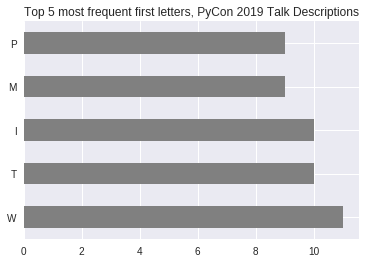

In [97]:
%matplotlib inline
(descrip['first letter']
 .value_counts()
 .head(5)
 .plot
 .barh(color='grey',
      title='Top 5 most frequent first letters, PyCon 2019 Talk Descriptions'));

# Assignment

**Scrape** the talk descriptions. Hint: `soup.select('.presentation-description')`

**Make** new columns in the dataframe:
- description
- description character count
- description word count

**Describe** all the dataframe's columns. What's the average description word count? The minimum? The maximum?

**Answer** the question: Which descriptions could fit in a tweet?


# Stretch Challenge

**Make** another new column in the dataframe:
- description grade level (you can use [this `textstat` function](https://github.com/shivam5992/textstat#the-flesch-kincaid-grade-level) to get the Flesh-Kincaid grade level)

**Answer** the question: What's the distribution of grade levels? Plot a histogram.

**Be aware** that [Textstat has issues when sentences aren't separated by spaces](https://github.com/shivam5992/textstat/issues/77#issuecomment-453734048). (A Lambda School Data Science student helped identify this issue, and emailed with the developer.) 

Also, [BeautifulSoup doesn't separate paragraph tags with spaces](https://bugs.launchpad.net/beautifulsoup/+bug/1768330).

So, you may get some inaccurate or surprising grade level estimates here. Don't worry, that's ok — but optionally, can you do anything to try improving the grade level estimates?